# Regression

## Preprocessing

In [ ]:
# IMPORT

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
# Read dataset

data = pd.read_csv('https://raw.githubusercontent.com/iqrafarhan/KASDD/main/cancer_reg.csv')
print("Size of Data: ", data.shape)
data.head()

Data memiliki ukuran: (3047, 36)


,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_logistic,TARGET_softmax
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,36.9,41.7,"Kitsap County, Washington",2.54,52.5,11.5,39.5,42.1,6.9,23.2,19.6,51.9,8.0,75.1,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831,1,2
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,32.2,33.7,"Kittitas County, Washington",2.34,44.5,6.1,22.4,64.0,7.5,26.0,22.7,55.9,7.8,70.2,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096,1,2
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,44.0,45.8,"Klickitat County, Washington",2.62,54.2,24.0,36.6,NaN,9.5,29.0,16.0,45.9,7.0,63.7,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488,1,2
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,42.2,43.4,"Lewis County, Washington",2.52,52.7,20.2,41.2,36.1,2.5,31.6,9.3,48.3,12.1,58.4,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841,2,3
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,47.8,48.9,"Lincoln County, Washington",2.34,57.8,14.9,43.0,40.0,2.0,33.4,15.0,48.2,4.8,61.6,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657,1,1


### Data Summary

ATRIBUTTES FROM DATASET:

*   TARGET_deathRate: Dependent variable.

*   Mean per capita (100,000) cancer mortalities(a)

*   TARGET_logistic: Dependent variable. Klasifikasi dari kolom TARGET_deathRate,
dimana :
1 => TARGET_deathRate <=180
2 => TARGET_deathRate > 180

*   TARGET_softmax: Dependent variable. Klasifikasi dari kolom TARGET_deathRate, dimana :
1 => TARGET_deathRate < 160
2 => 160 <= TARGET_deathRate < 190
3 => TARGET_deathRate >= 190


* avgAnnCount: Mean number of reported cases of cancer diagnosed annually(a)
* avgAnnCount: Mean number of reported cases of cancer diagnosed annually(a)
* avgDeathsPerYear: Mean number of reported mortalities due to cancer(a)
* incidenceRate: Mean per capita (100,000) cancer diagoses(a)
* medianIncome: Median income per county (b)
* popEst2015: Population of county (b)
* povertyPercent: Percent of populace in poverty (b)
* studyPerCap: Per capita number of cancer-related clinical trials per county (a)
* binnedInc: Median income per capita binned by decile (b)
* MedianAge: Median age of county residents (b)
* MedianAgeMale: Median age of male county residents (b)
* MedianAgeFemale: Median age of female county residents (b)
* Geography: County name (b)
* AvgHouseholdSize: Mean household size of county (b)
* PercentMarried: Percent of county residents who are married (b)
* PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than
high school (b)
* PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school
diploma (b)
* PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some
college (b)
* PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained:
bachelor's degree (b)
* PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high
school diploma (b)
* PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained:
bachelor's degree (b)
* PctEmployed16_Over: Percent of county residents ages 16 and over employed (b)
* PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed (b)
* PctPrivateCoverage: Percent of county residents with private health coverage (b)
* PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no
public assistance) (b)
* PctEmpPrivCoverage: Percent of county residents with employee-provided private health
coverage (b)
* PctPublicCoverage: Percent of county residents with government-provided health coverage (b)
* PctPubliceCoverageAlone: Percent of county residents with government-provided health
coverage alone (b)
* PctWhite: Percent of county residents who identify as White (b)
* PctBlack: Percent of county residents who identify as Black (b)
* PctAsian: Percent of county residents who identify as Asian (b)
* PctOtherRace: Percent of county residents who identify in a category which is not White,
Black, or Asian (b)
* PctMarriedHouseholds: Percent of married households (b)
* BirthRate: Number of live births relative to number of women in county (b)


In [ ]:
# Dimenstion of data
print("Dimension of data: ", data.shape)

dimensi data:  (3047, 36)


In [ ]:
# Data types
data.describe(include=np.object)

,binnedInc,Geography
count,3047,3047
unique,10,3047
top,"(45201, 48021.6]","Maverick County, Texas"
freq,306,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried          

It can be seen from the types of attributes above that types with **types int64 and float64 can be interpreted as Numeric types**. Meanwhile, attributes with **object type are interpreted as Categorical** types.

### Data Duplication, Missing Values, and Outliers

In [ ]:
# Data Duplication
print("Number of Duplications: ", data.duplicated(keep=False).sum())

Jumlah Duplikasi data:  0


In [ ]:
# Missing values
data.isna().sum()

avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     609
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOther

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


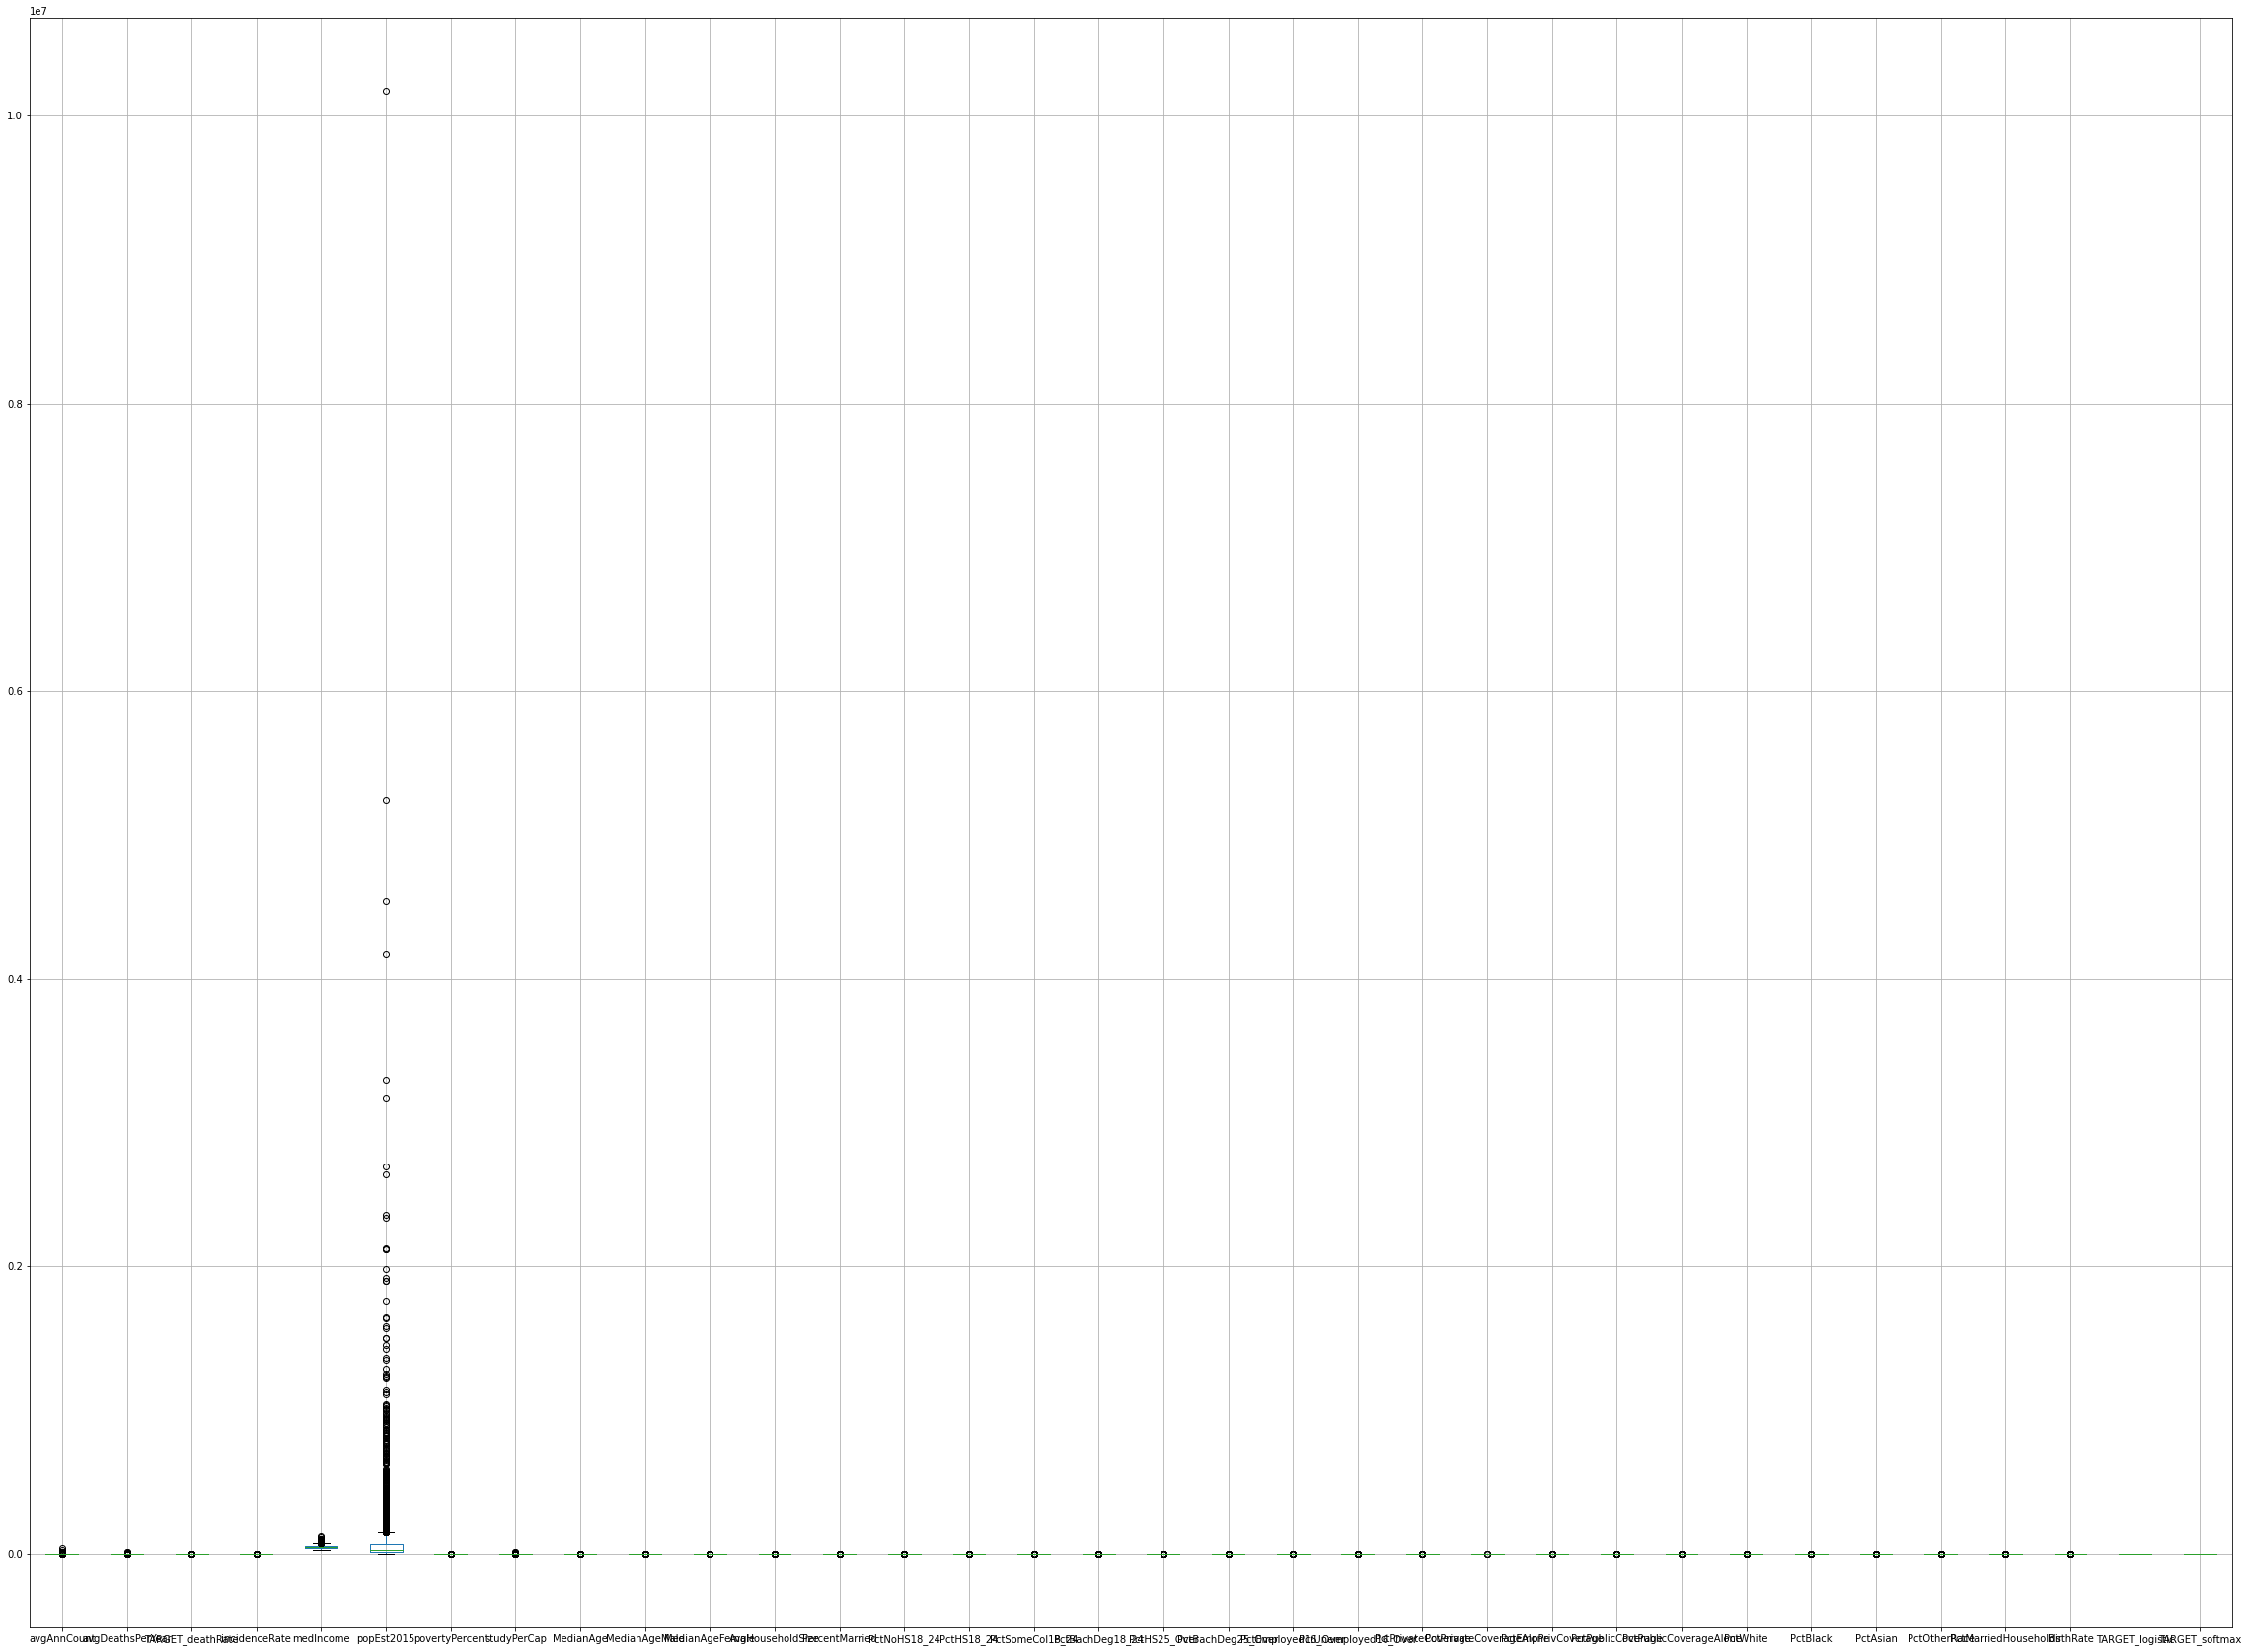

In [ ]:
# Boxplot to check for Outliers

data.boxplot(figsize=(40,30))

In [ ]:
new_data = data.copy()

Q1 = new_data.quantile(0.25)
Q3 = new_data.quantile(0.75)
IQR = Q3 - Q1

upperbound = Q3 + 1.5 * IQR
lowerbound = Q1 - 1.5 * IQR

is_outlier = new_data[(new_data > upperbound) | (new_data < lowerbound)]

print("Number of outliers for each attribute: ")
print(is_outlier.count())

Banyaknya outlier untuk tiap tiap atribut: 
avgAnnCount                461
avgDeathsPerYear           349
TARGET_deathRate            64
incidenceRate               93
medIncome                  122
popEst2015                 412
povertyPercent              69
studyPerCap                504
binnedInc                    0
MedianAge                   93
MedianAgeMale               89
MedianAgeFemale             78
Geography                    0
AvgHouseholdSize           201
PercentMarried              68
PctNoHS18_24                69
PctHS18_24                  52
PctSomeCol18_24             31
PctBachDeg18_24             94
PctHS25_Over                31
PctBachDeg25_Over           82
PctEmployed16_Over          20
PctUnemployed16_Over        68
PctPrivateCoverage          21
PctPrivateCoverageAlone      4
PctEmpPrivCoverage           9
PctPublicCoverage           18
PctPublicCoverageAlone      36
PctWhite                   174
PctBlack                   395
PctAsian                  

From the outlier results, it can be concluded that there are several attributes that have outliers.

**Based on the exploration, I'm going to carry out data preparation until the data is "clean" enough and can provide maximum regression results.**

**Exploration with Correlation Matrix**

Text(0.5, 1.0, 'Correlation Matrix')

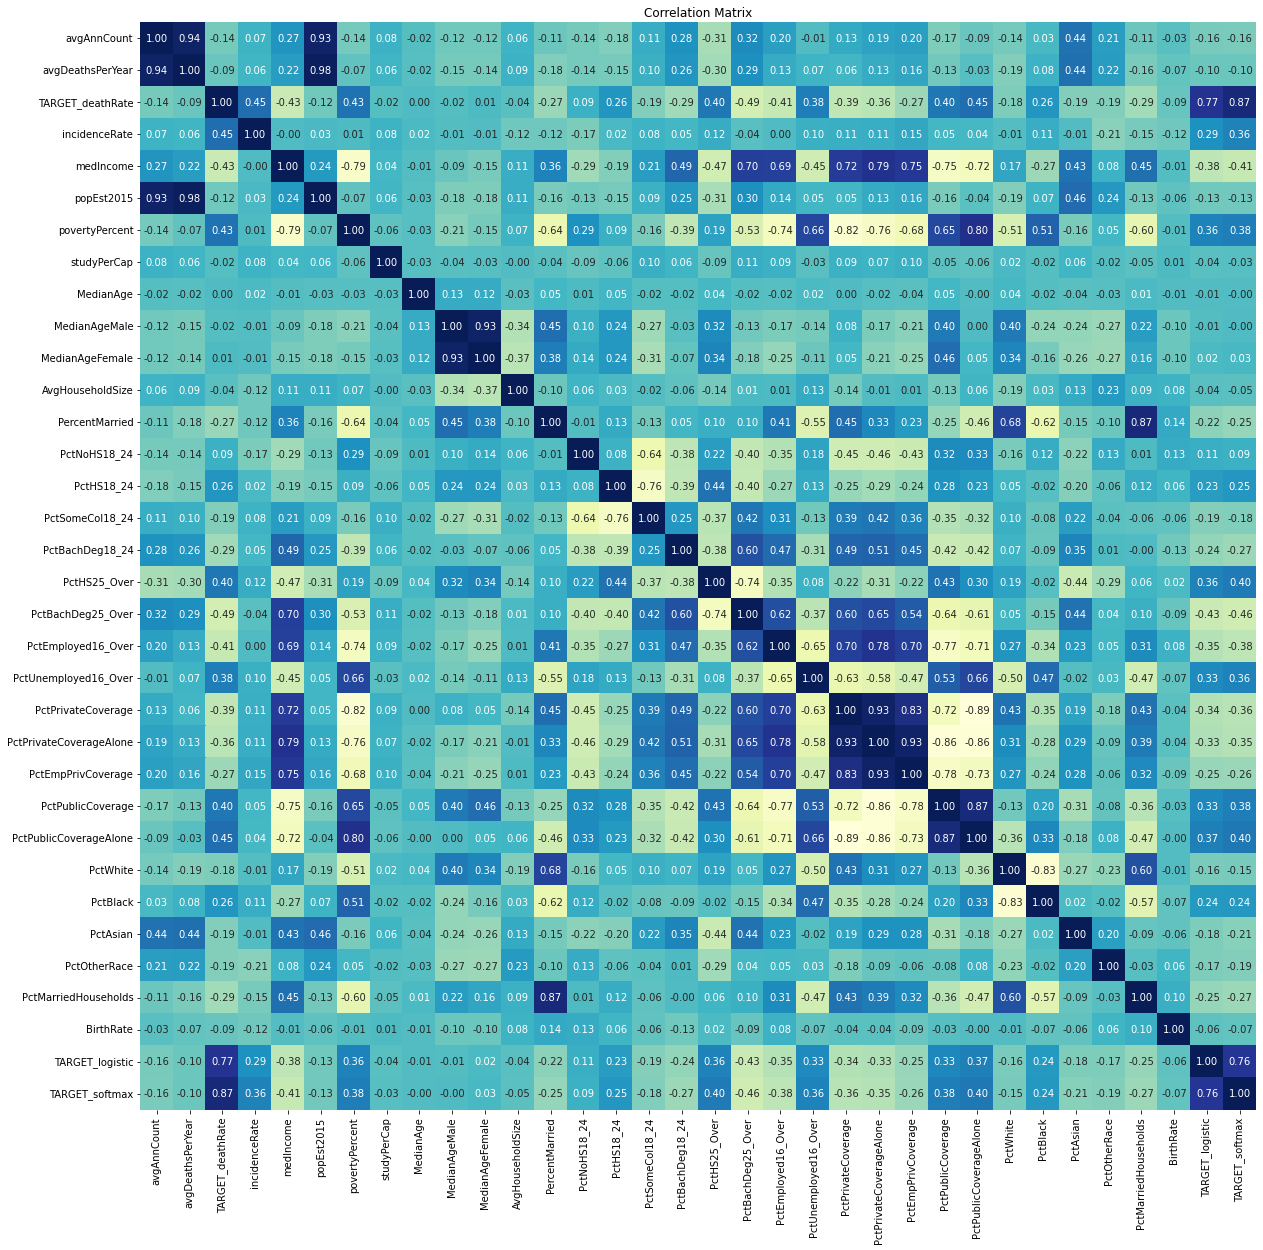

In [ ]:
# Correlation matrix visualization

plt.figure(figsize=(20,20))

sns.heatmap(data.select_dtypes(np.number).corr(),
        annot=True,
        cbar = False,
        fmt="0.2f",
        cmap="YlGnBu",
        xticklabels=data.select_dtypes(np.number).columns,
        yticklabels=data.select_dtypes(np.number).columns)

plt.title("Correlation Matrix")

**Missing Values**

I will clean the data provided because the results of the data provided still have missing values and outliers, so I will handle missing values and outliers.

Missing values will be handled by filling in empty fields with median or mean.

In [ ]:
skew = data[['PctSomeCol18_24', 'PctEmployed16_Over', 'PctPrivateCoverageAlone']].skew(axis=0)
skew

PctSomeCol18_24            0.392411
PctEmployed16_Over        -0.387649
PctPrivateCoverageAlone   -0.009915
dtype: float64

Based on the skewness results of attributes that have missing values, because the numbers show values that are not 0 (asymmetric skewness), therefore I use Median.

In [ ]:
# Fill Missing Values with Median

data_cleaned = data.copy()
data_cleaned['PctSomeCol18_24'] = data_cleaned['PctSomeCol18_24'].fillna(data_cleaned['PctSomeCol18_24'].median())
data_cleaned['PctEmployed16_Over'] = data_cleaned['PctEmployed16_Over'].fillna(data_cleaned['PctEmployed16_Over'].median())
data_cleaned['PctPrivateCoverageAlone'] = data_cleaned['PctPrivateCoverageAlone'].fillna(data_cleaned['PctPrivateCoverageAlone'].median())


In [ ]:
# Missing values

data_cleaned.isna().sum()

avgAnnCount                0
avgDeathsPerYear           0
TARGET_deathRate           0
incidenceRate              0
medIncome                  0
popEst2015                 0
povertyPercent             0
studyPerCap                0
binnedInc                  0
MedianAge                  0
MedianAgeMale              0
MedianAgeFemale            0
Geography                  0
AvgHouseholdSize           0
PercentMarried             0
PctNoHS18_24               0
PctHS18_24                 0
PctSomeCol18_24            0
PctBachDeg18_24            0
PctHS25_Over               0
PctBachDeg25_Over          0
PctEmployed16_Over         0
PctUnemployed16_Over       0
PctPrivateCoverage         0
PctPrivateCoverageAlone    0
PctEmpPrivCoverage         0
PctPublicCoverage          0
PctPublicCoverageAlone     0
PctWhite                   0
PctBlack                   0
PctAsian                   0
PctOtherRace               0
PctMarriedHouseholds       0
BirthRate                  0
TARGET_logisti

**Outlier**

In [ ]:
data_cleaned = data_cleaned.drop(['binnedInc'], axis=1)
data_cleaned = data_cleaned.drop(['Geography'], axis=1)

In [ ]:
# Outlier Handling

new_data = data_cleaned.copy()

Q1 = new_data.quantile(0.25)
Q3 = new_data.quantile(0.75)
IQR = Q3 - Q1

upperbound = Q3 + 1.5 * IQR
lowerbound = Q1 - 1.5 * IQR

temp = new_data[((new_data <= upperbound) & (new_data >= lowerbound)).all(axis=1)]
is_outlier1 = temp[(new_data > upperbound) | (new_data < lowerbound)]

new_data = temp

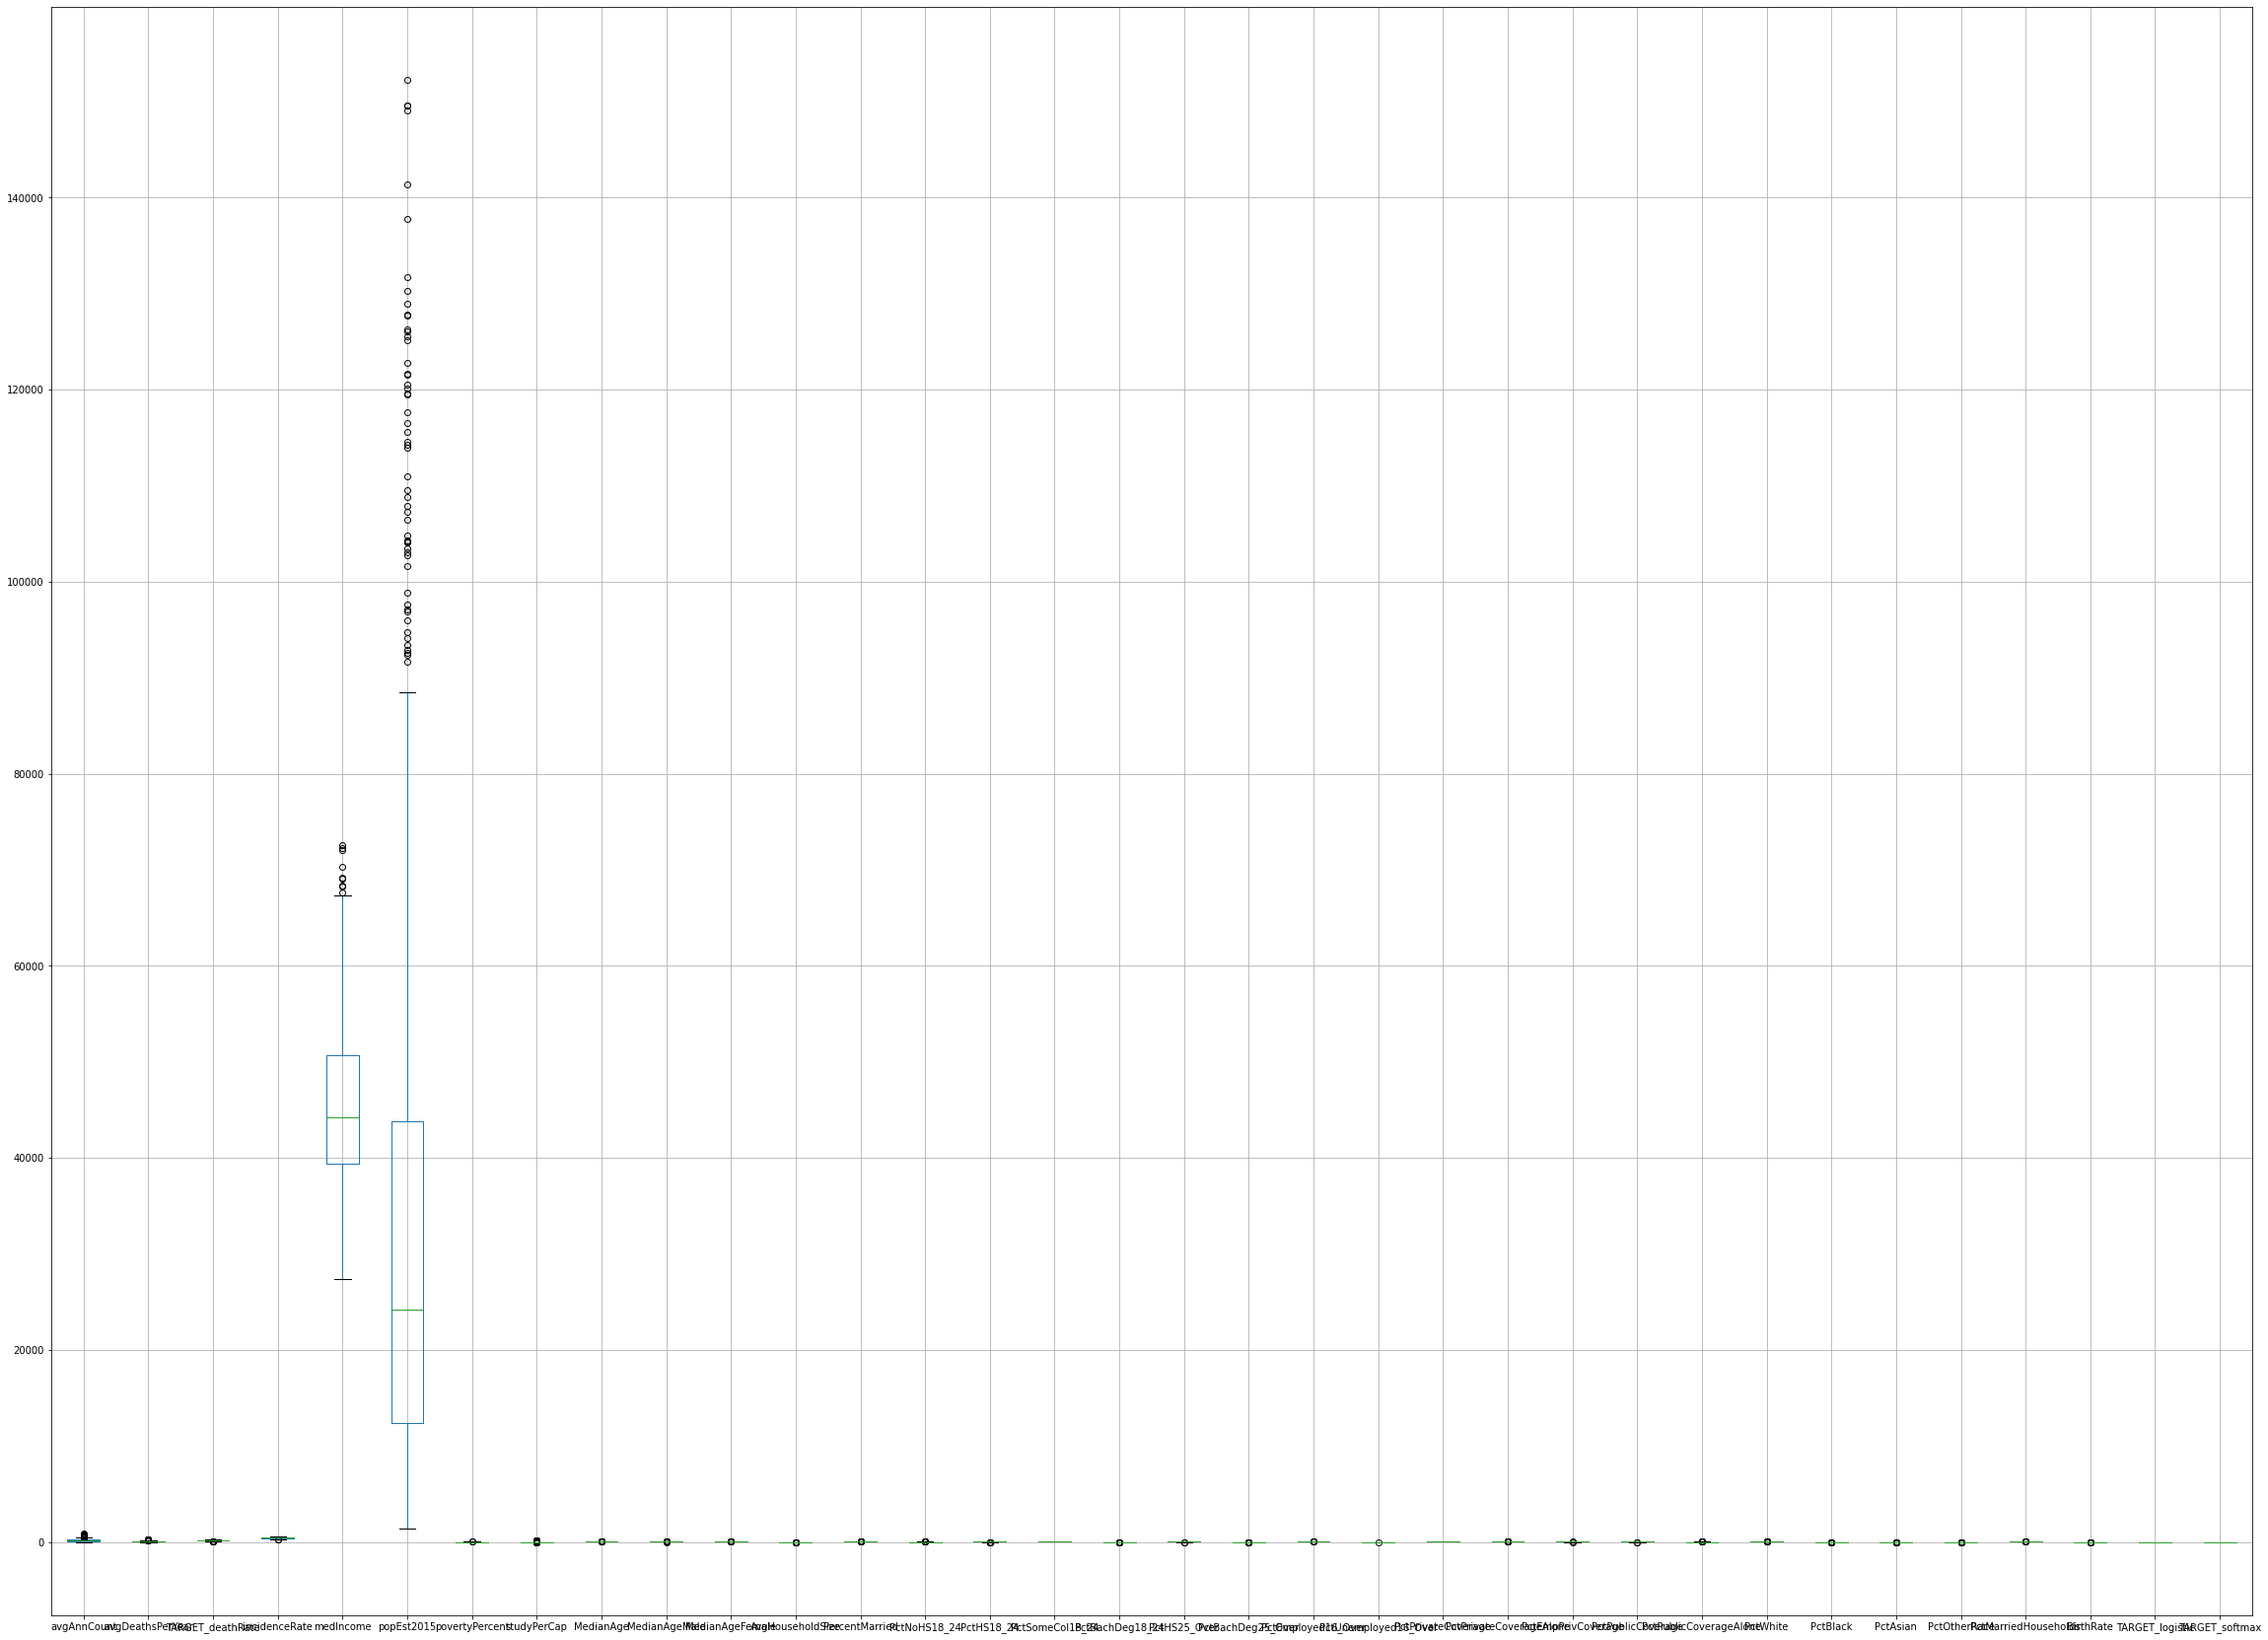

In [ ]:
# Boxplot to check for Outliers
new_data.boxplot(figsize=(40,30))

In [ ]:
print("Number of outliers for each attribute: ")
print(is_outlier1.count())

Banyaknya outlier untuk tiap tiap atribut: 
avgAnnCount                0
avgDeathsPerYear           0
TARGET_deathRate           0
incidenceRate              0
medIncome                  0
popEst2015                 0
povertyPercent             0
studyPerCap                0
MedianAge                  0
MedianAgeMale              0
MedianAgeFemale            0
AvgHouseholdSize           0
PercentMarried             0
PctNoHS18_24               0
PctHS18_24                 0
PctSomeCol18_24            0
PctBachDeg18_24            0
PctHS25_Over               0
PctBachDeg25_Over          0
PctEmployed16_Over         0
PctUnemployed16_Over       0
PctPrivateCoverage         0
PctPrivateCoverageAlone    0
PctEmpPrivCoverage         0
PctPublicCoverage          0
PctPublicCoverageAlone     0
PctWhite                   0
PctBlack                   0
PctAsian                   0
PctOtherRace               0
PctMarriedHouseholds       0
BirthRate                  0
TARGET_logistic            0

### Normalization

Because at the next stage a regression needs to be carried out. Features with a larger range usually have a greater influence than features with a smaller range, and normalization is carried out so as not to cause bias. In this normalization, I use normalization with min-max.

In [ ]:
X = new_data.drop(['TARGET_deathRate', 'TARGET_logistic', 'TARGET_softmax'], axis=1)
target = new_data['TARGET_deathRate']

In [ ]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
target = np.array(target)

## **Regression**
Here I use 'TARGET_deathRate' as target column.

### Linear Regression

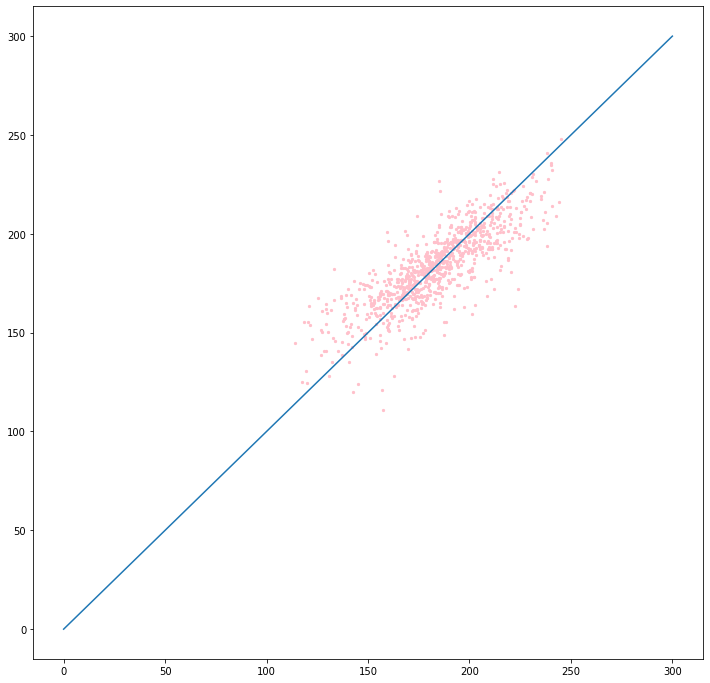

In [ ]:
# Visualtization of prediction results

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math

model = LinearRegression().fit(X_std, target)
prediction = model.predict(X_std)

plt.figure(figsize=(12,12))
plt.scatter(target, prediction, color='pink', s=5)
plt.plot([0, 300], [0, 300])

In [ ]:
# Display MSE, MAE, RMSE, and R2 Square values

# MSE
print('Mean squared error (MSE): %.10f' % mean_squared_error(target, prediction))
# MAE
print('Mean absolute error (MAE): %.10f' % mean_absolute_error(target, prediction))
# RMSE
print('Root mean squared error (RMSE): %.10f' % math.sqrt(mean_squared_error(target, prediction)))
# R2 Square
print('R2 Square: %.10f' % r2_score(target, prediction))

Mean squared error (MSE): 197.8230449469
Mean absolute error (MAE): 10.5646989679
Root mean squared error (RMSE): 14.0649580500
R2 Square: 0.6598908389


The graph shows that with the target on the x-axis, and prediction on the y-axis, it produces prediction points by the regression model where the correct prediction on the target is on the line x = y.

### Ridge Regression

In [ ]:
# Display R2 Square value

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

modelRidge1 = linear_model.Ridge(alpha = 1.0).fit(X_std, target)
predictionRidge1 = modelRidge1.predict(X_std)

# MSE
print('Mean squared error (MSE) dengan alpha default (1.0): %.10f' % mean_squared_error(target, predictionRidge1))
# R2 Square
print('R2 Square dengan tol default (0.001): %.10f' % r2_score(target, predictionRidge1))

Mean squared error (MSE) dengan alpha default (1.0): 199.9320822806
R2 Square dengan tol default (0.001): 0.6562648563


In [ ]:
# Try changing the alpha parameter to a larger value and analyze how the change in this parameter relates to the quality of the regression results.

modelRidge2 = linear_model.Ridge(alpha = 2.0).fit(X_std, target)
predictionRidge2 = modelRidge2.predict(X_std)

# MSE
print('Mean squared error (MSE) with tol default (2.0): %.10f' % mean_squared_error(target, predictionRidge2))
# R2 Square
print('R2 Square with tol default (0.00001): %.10f' % r2_score(target, predictionRidge2))

Mean squared error (MSE) dengan tol default (2.0): 204.1522285972
R2 Square dengan tol default (0.00001): 0.6490093294


The alpha parameter is a parameter that represents the "strength" of the regularization carried out by the model. Regularization is a modification technique used to reduce *generalization error*, in other words to avoid *overfitting*. This is done by providing limits/*constraints* or adding penalties to the parameters/attributes that we use. For more clarity, please read the Ridge and Lasso model documentation at the following link: [API Reference — scikit-learn 1.0.1 documentation ](https://scikit-learn.org/stable/modules/classes.html#module- sklearn.linear_model)

High Alpha Value: As alpha becomes very large, the regularization effect dominates, and the coefficients are pushed closer to zero. This can lead to underfitting, where the model is too simple to capture the underlying pattern in the data, resulting in poor predictive performance.

Result shows that there's not much of a difference in MSE and R2 score after changing the value of alpha. This is because it might already be in the optimal range of alpha values where the model's performance is relatively stable. Small changes within this range may not significantly impact the model's performance.

### Lasso Regressionn

In [ ]:
# Display R2 Square value

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

modelLasso1 = linear_model.Lasso(alpha = 1.0).fit(X_std, target)
predictionLasso1 = modelLasso1.predict(X_std)

# MSE
print('Mean squared error (MSE) dengan tol default (0.001): %.10f' % mean_squared_error(target, predictionLasso1))
# R2 Square
print('R2 Square dengan tol default (0.001): %.10f' % r2_score(target, predictionLasso1))



Mean squared error (MSE) dengan tol default (0.001): 317.1440845597
R2 Square dengan tol default (0.001): 0.4547470010


In [ ]:
# Try changing the alpha parameter to a larger value and analyze how the change in this parameter relates to the quality of the regression results.

modelLasso2 = linear_model.Lasso(alpha = 2.0).fit(X_std, target)
predictionLasso2 = modelLasso2.predict(X_std)

# MSE
print('Mean squared error (MSE) dengan alpha default (1): %.10f' % mean_squared_error(target, predictionLasso2))
# R2 Square
print('R2 Square dengan alpha default (2): %.10f' % r2_score(target, predictionLasso2))

Mean squared error (MSE) dengan alpha default (1): 336.7909644001
R2 Square dengan alpha default (2): 0.4209689150


## **Logistic and Softmax Regression**
Here I use 'TARGET_deathRate' as target column.

### Logistic Regression

In [ ]:
# Independent variable
x2 = new_data.drop(["TARGET_logistic"], axis = 1)

# Dependent variable
target2 = new_data["TARGET_logistic"]
new_data.shape

(914, 34)

In [ ]:
x2_std = StandardScaler().fit_transform(x2)
target2 = np.array(target2)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x2_std, target2, test_size = 0.2, random_state = 123)

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

In [ ]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[81,  2],
       [ 1, 99]])

Text(0.5, 257.44, 'Predicted label')

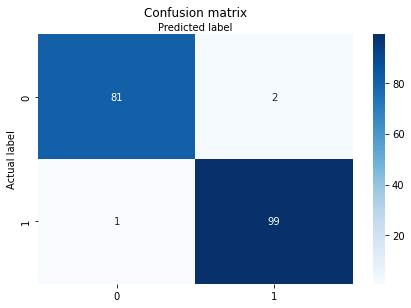

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9836065573770492
Precision: 0.9878048780487805
Recall: 0.9759036144578314


### Softmax Regression


In [ ]:
# Independent variable
x3 = new_data.drop(["TARGET_softmax"], axis = 1)

# Dependent variable
target3 = new_data["TARGET_softmax"]

In [ ]:
x3_std = StandardScaler().fit_transform(x3)
target3 = np.array(target3)

In [ ]:
from sklearn.model_selection import train_test_split
x_train2, x_test2, y_train2, y_test2 = train_test_split(x3_std, target3, test_size = 0.2, random_state = 123)

In [ ]:
from sklearn.linear_model import LogisticRegression

softmax = LogisticRegression(multi_class='multinomial', solver='lbfgs')
softmax.fit(x_train2,y_train2)
y_pred2=softmax.predict(x_test2)

In [ ]:
from sklearn import metrics

cnf_matrix2 = metrics.confusion_matrix(y_test2, y_pred2)
cnf_matrix2

array([[28,  4,  0],
       [ 0, 77,  2],
       [ 0,  4, 68]])

Text(0.5, 257.44, 'Predicted label')

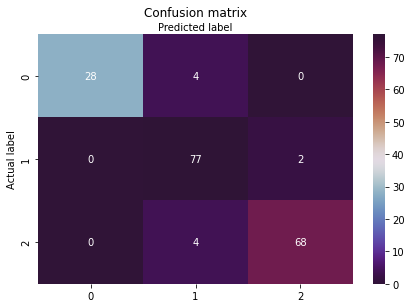

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Heatmap
sns.heatmap(pd.DataFrame(cnf_matrix2), annot=True, cmap="twilight_shifted" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred2))
print("Precision:",metrics.precision_score(y_test2, y_pred2,average='macro'))
print("Recall:",metrics.recall_score(y_test2, y_pred2, average='macro'))

Accuracy: 0.9453551912568307
Precision: 0.9591036414565827
Recall: 0.931375996249414
